In [1]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing CSV files


df_adjust_Limits = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Continuous Data\contData_all.csv")

df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\PVs\adjust_limits.csv")


In [3]:
num_columns = df_adjust_Limits.shape[1]
print("Number of features:", num_columns)

Number of features: 20


In [4]:
# # Convert 'Date' column to datetime in df_adjust_Limits and df_LD using the appropriate format
# df_adjust_Limits['Date'] = pd.to_datetime(df_adjust_Limits['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# # Check for NaT entries in both dataframes
# nat_count_CD = df_adjust_Limits['Date'].isna().sum()

df_adjust_Limits.describe()

,425_pct_Al,M_Value,C4_pct_Eth,C4_pct_H2O,C4_pct_Hex,Butanol,HydWtr_pct_Ammonia,HydWtr_Na2O,DI55152,FC55003,FC55552,FC55569,FFC55553,FFC55555,LC55555,PI55004,TC55552,TC55555,TI55021
count,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000,97675.000000
mean,2.372545,3.635591,1.557511,20.612519,0.514260,170.329150,0.967146,0.960200,0.945141,4534.501879,26628.365467,5159.163768,8.642655,1.846413,46.492267,1.772517,140.428734,150.530347,209.687824
std,156.604582,0.618836,3.701786,4.356163,0.793046,804.494946,0.218444,3.651101,0.058427,2662.170762,15871.658077,2677.354223,61.044423,27.638980,25.834790,1.761427,59.834690,63.457087,46.547459
min,-9986.000000,0.000000,0.001000,0.057000,0.000000,0.000000,0.021000,-0.256120,0.000000,-24.455300,-12997.800000,0.000000,0.000000,0.000000,-0.631604,-9.935260,0.000000,0.000000,0.000000
25%,5.973750,3.516855,0.681930,17.984800,0.323000,4.063400,0.861474,0.389235,0.916205,3298.685000,17671.600000,5702.805000,0.944019,0.720402,42.196650,0.478593,141.830000,179.574000,216.913000
50%,6.120170,3.606910,1.265670,20.052800,0.412198,7.803330,0.935000,0.616935,0.943462,5572.400000,35755.600000,6437.200000,0.988546,0.767929,55.127900,1.582950,164.366000,180.040000,220.931000
75%,6.268290,3.708370,1.672050,22.790850,0.517836,34.119400,1.034035,1.002525,0.981420,6311.105000,38113.550000,6738.185000,1.020090,0.786486,65.108000,2.822090,178.313000,181.874000,225.418000
max,8.058320,30.115400,90.136000,95.818000,15.840400,36301.200000,10.726700,279.492000,1.317230,20772.500000,52000.000000,12933.400000,2955.150000,1224.330000,104.971000,21.190600,213.521000,297.875000,741.350000


In [5]:
# Annotate all range adjustements with rationale

#df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Data\CSV to PRocess\RangeD.csv")
df_adjustments

,Range,425 %Al,Butanol,Decanol,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FI55580,FYC55553,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,TI55565,TI90366,TI90368
0,Min,0,0,0,0,5000,0,0,0,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-10.0,-10.0,-4.7,0,100,100,100,0,0,0,0,0,0,0,0,0,150,0
1,Max,10,100,10,50000,50000,40000,3000,70000,70000,52000,70000,12800,1500,10,1,70000,60000,100,100,100,100,100,100,100,20.3,20.3,10.3,250.0,300,275,300,300,125,300,300,300,300,300,350,350,300,200,200


In [6]:
#Finds and removes system limit (Min/Max) values

# Assuming df_adjustments and df_adjust_Limits are your dataframes

# Extract the min and max rows from df_adjustments into separate Series
min_values = df_adjustments[df_adjustments['Range'] == 'Min'].iloc[0, 1:]
max_values = df_adjustments[df_adjustments['Range'] == 'Max'].iloc[0, 1:]

# Iterate through each column in df_adjust_Limits
for col in df_adjust_Limits.columns:
    # Check if the column exists in df_adjustments
    if col in min_values.index:
        # Get the min and max values for this column from df_adjustments
        min_val = min_values[col]
        max_val = max_values[col]
        
        # Filter out values in df_adjust_Limits that are less than min or greater than max
        df_adjust_Limits.loc[df_adjust_Limits[col] < min_val, col] = None
        df_adjust_Limits.loc[df_adjust_Limits[col] > max_val, col] = None


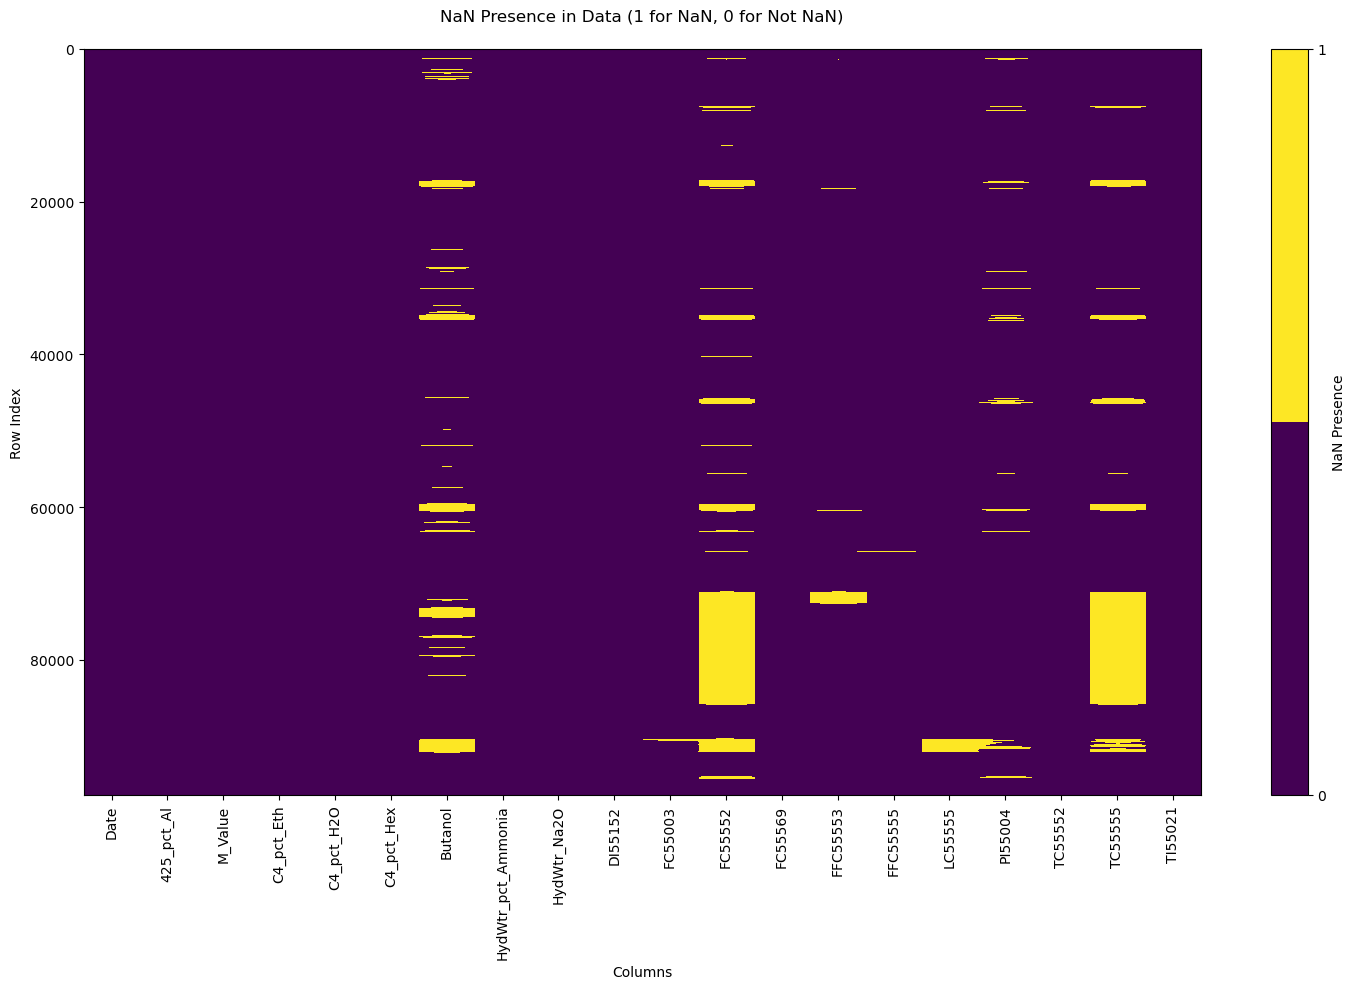

In [7]:
# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_adjust_Limits.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_adjust_Limits.shape[1]), df_adjust_Limits.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()

In [8]:
# Calculate the statistics for each column in df_adjust_Limits
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date       97675          97675          0        0.000000
1           425_pct_Al       97675          97675          0        0.000000
2              M_Value       97675          97675          0        0.000000
3           C4_pct_Eth       97675          97675          0        0.000000
4           C4_pct_H2O       97675          97675          0        0.000000
5           C4_pct_Hex       97675          97675          0        0.000000
6              Butanol       97675          82078      15597       15.968262
7   HydWtr_pct_Ammonia       97675          97675          0        0.000000
8          HydWtr_Na2O       97675          97675          0        0.000000
9              DI55152       97675          97675          0        0.000000
10             FC55003       97675          97428        247        0.252879
11             FC55552       97675          73947      23728       24.292808

In [9]:
#Analysis of remaining NaNs suggests minimal impact - REMOVE

df_adjust_Limits = df_adjust_Limits.dropna()

# Calculate the statistics for each column in df_pivot
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date       66283          66283          0             0.0
1           425_pct_Al       66283          66283          0             0.0
2              M_Value       66283          66283          0             0.0
3           C4_pct_Eth       66283          66283          0             0.0
4           C4_pct_H2O       66283          66283          0             0.0
5           C4_pct_Hex       66283          66283          0             0.0
6              Butanol       66283          66283          0             0.0
7   HydWtr_pct_Ammonia       66283          66283          0             0.0
8          HydWtr_Na2O       66283          66283          0             0.0
9              DI55152       66283          66283          0             0.0
10             FC55003       66283          66283          0             0.0
11             FC55552       66283          66283          0             0.0

In [10]:
# 73745

df_adjust_Limits = df_adjust_Limits.sort_values('Date')
df_adjust_Limits = df_adjust_Limits.reset_index(drop=True)


# Save DataFrame to CSV file in the same directory as the Jupyter Notebook
df_adjust_Limits.to_csv('adjusted_Limits.csv', index=False)

In [11]:
df_adjust_Limits.describe()

# 66283
# 64899
# 64357

,425_pct_Al,M_Value,C4_pct_Eth,C4_pct_H2O,C4_pct_Hex,Butanol,HydWtr_pct_Ammonia,HydWtr_Na2O,DI55152,FC55003,FC55552,FC55569,FFC55553,FFC55555,LC55555,PI55004,TC55552,TC55555,TI55021
count,66283.000000,66283.000000,66283.000000,66283.000000,66283.000000,66283.000000,66283.000000,66283.000000,66283.000000,6.628300e+04,66283.000000,66283.000000,66283.000000,66283.000000,66283.000000,66283.000000,66283.000000,66283.000000,66283.000000
mean,4.321005,3.637914,1.446363,21.006658,0.546529,11.586813,0.987679,1.013275,0.943163,5.948169e+03,35335.644651,6614.664076,0.989771,0.773587,58.582882,2.350522,167.706113,181.017221,223.974044
std,109.673057,0.735324,2.707584,4.430069,0.883020,15.633772,0.205286,4.383488,0.042725,1.035937e+03,5517.359209,483.519515,0.060144,0.027327,10.515277,1.329034,15.905350,1.822726,10.913882
min,-9730.860000,0.571967,0.001000,0.057000,0.000000,0.000000,0.063109,-0.256120,0.000000,1.930000e-17,6376.690000,0.000000,0.042564,0.000000,0.000000,0.000000,98.687500,100.587000,0.000000
25%,5.991730,3.508385,0.682053,18.354550,0.333132,3.564480,0.877701,0.413891,0.914872,5.375710e+03,33945.450000,6340.610000,0.969245,0.759275,49.861550,1.314275,155.330500,179.968000,217.862500
50%,6.136750,3.598720,1.297090,20.862100,0.431821,5.750000,0.946479,0.645917,0.938676,5.952690e+03,37584.500000,6575.010000,0.991466,0.777151,60.144700,2.075940,171.259000,180.135000,221.062000
75%,6.292715,3.700190,1.761290,23.014350,0.534672,11.553300,1.049065,0.998015,0.964658,6.531295e+03,38956.850000,6827.645000,1.017050,0.789887,67.722700,3.175030,180.155000,182.042000,225.211000
max,8.058320,30.115400,77.165000,95.818000,13.392400,99.950000,3.744840,279.492000,1.070140,1.470590e+04,52000.000000,10503.000000,1.475490,1.000000,99.818500,12.531800,213.521000,239.332000,344.636000
